In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import sklearn
from IPython.display import display
%matplotlib inline

/Users/cgosmeyer/anaconda2/envs/astroconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/cgosmeyer/anaconda2/envs/astroconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
# Look at what uncertainty functions do on a synthetic 2-d dataset.
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# we rename the classes "blue" and "red" for illustration purposes
y_named = np.array(["blue", "red"])[y]

# we can call train_test_split with arbitrarily many arrays;
# all will be split in a consistent manner
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
        train_test_split(X, y_named, y, random_state=0)

# build the gradient boosting model
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=0,
              subsample=1.0, verbose=0, warm_start=False)

In [4]:
print("X_test.shape: {}".format(X_test.shape)) 
print("Decision function shape: {}".format(
gbrt.decision_function(X_test).shape))

X_test.shape: (25, 2)
Decision function shape: (25,)


In [5]:
# show the first few entries of decision_function
# positive number shows preference for "positive" class
print("Decision function:\n{}".format(gbrt.decision_function(X_test)[:6]))

Decision function:
[ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106]


In [6]:
# Recover prediction by looking only at the sign of the decision function
print("Thresholded decision function:\n{}".format( gbrt.decision_function(X_test) > 0))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Thresholded decision function:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [7]:
# make the boolean True/False into 0 and 1
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int) 
# use 0 and 1 as indices into classes_
pred = gbrt.classes_[greater_zero]
# pred is the same as the output of gbrt.predict
print("pred is equal to predictions: {}".format( np.all(pred == gbrt.predict(X_test))))

pred is equal to predictions: True


In [8]:
# The range of decision_function can be arbitrary
decision_function = gbrt.decision_function(X_test) 
print("Decision function minimum: {:.2f} maximum: {:.2f}".format(
np.min(decision_function), np.max(decision_function)))

Decision function minimum: -7.69 maximum: 4.29


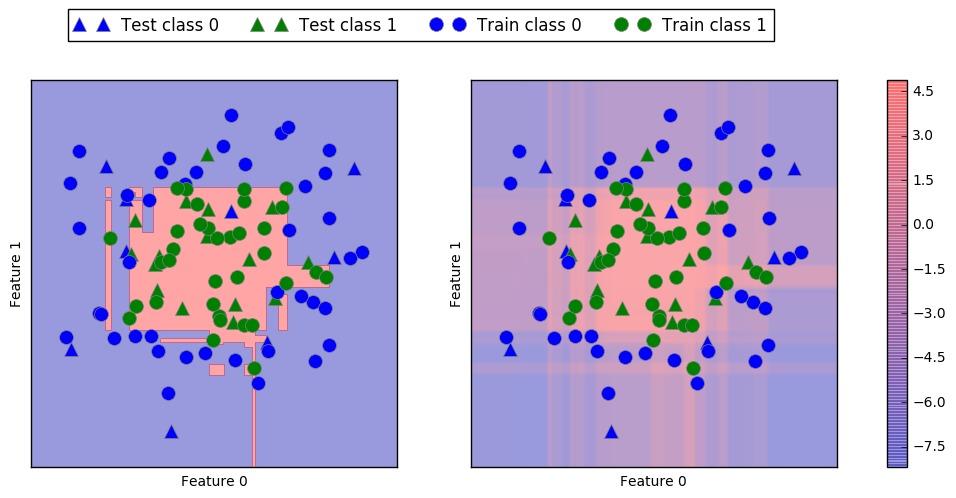

In [10]:
# Plot the decision_function for all points in the 2D plane,
# next to a visualization of hte decision boundary

fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
                                fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
                                            alpha=.4, cm=mglearn.ReBl)
for ax in axes:
    # plot training and test points 
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                            markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                                 markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
                    "Train class 1"], ncol=4, loc=(.1, 1.1))

In [11]:
# The output of `predict_probability` is a probability for each class.
print("Shape of probabilities: {}".format(gbrt.predict_proba(X_test).shape))

Shape of probabilities: (25, 2)


In [12]:
# show the first few entries of predict_proba
print("Predicted probabilities:\n{}".format( gbrt.predict_proba(X_test[:6])))

Predicted probabilities:
[[ 0.01573626  0.98426374]
 [ 0.84575649  0.15424351]
 [ 0.98112869  0.01887131]
 [ 0.97406775  0.02593225]
 [ 0.01352142  0.98647858]
 [ 0.02504637  0.97495363]]


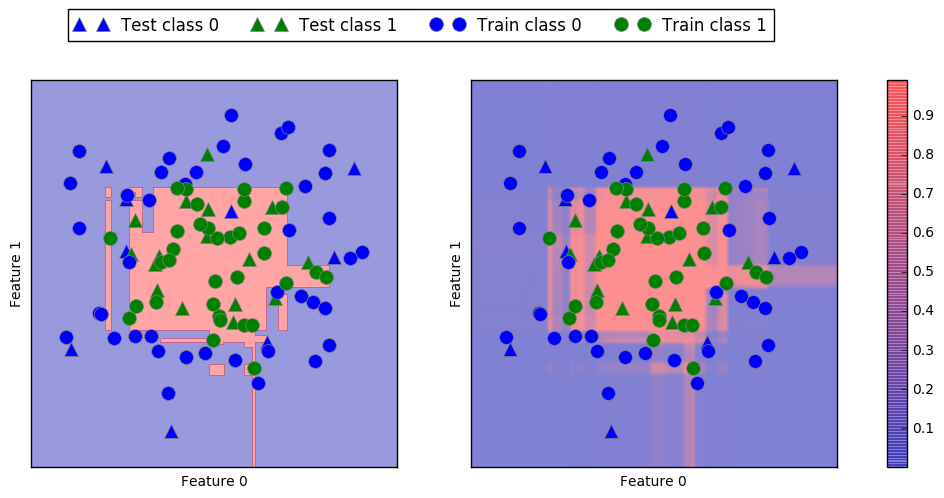

In [13]:
# Again show the decision boundary on the dataset, but now next 
# to the class probabilty for class 1.

fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(
    gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
    gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    # plot training and test points 
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                                  markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                                  markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
                "Train class 1"], ncol=4, loc=(.1, 1.1))

In [15]:
# Uncertainty in multiclass classifiction
# Look at 3-class Iris dataset for example.
from sklearn.datasets import load_iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=42)
gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

print("Decision function shape: {}".format(gbrt.decision_function(X_test).shape)) 
# plot the first few entries of the decision function
print("Decision function:\n{}".format(gbrt.decision_function(X_test)[:6, :]))

Decision function shape: (38, 3)
Decision function:
[[-0.52931069  1.46560359 -0.50448467]
 [ 1.51154215 -0.49561142 -0.50310736]
 [-0.52379401 -0.4676268   1.51953786]
 [-0.52931069  1.46560359 -0.50448467]
 [-0.53107259  1.28190451  0.21510024]
 [ 1.51154215 -0.49561142 -0.50310736]]


In [16]:
print("Argmax of decision function:\n{}".format( np.argmax(gbrt.decision_function(X_test), axis=1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Argmax of decision function:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [17]:
# show the first few entries of predict_proba
print("Predicted probabilities:\n{}".format(gbrt.predict_proba(X_test)[:6])) # show that sums across rows are one
print("Sums: {}".format(gbrt.predict_proba(X_test)[:6].sum(axis=1)))

Predicted probabilities:
[[ 0.10664722  0.7840248   0.10932798]
 [ 0.78880668  0.10599243  0.10520089]
 [ 0.10231173  0.10822274  0.78946553]
 [ 0.10664722  0.7840248   0.10932798]
 [ 0.10825347  0.66344934  0.22829719]
 [ 0.78880668  0.10599243  0.10520089]]
Sums: [ 1.  1.  1.  1.  1.  1.]


In [18]:
print("Argmax of predicted probabilities:\n{}".format( np.argmax(gbrt.predict_proba(X_test), axis=1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

Argmax of predicted probabilities:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
